In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 500 # this will set limit of columns to 500
pd.options.display.max_rows = 10


In [62]:
dataset = pd.read_csv('datasets/q1_q17_dr25_sup_koi_2024.04.11_11.47.30.csv')
dataset = dataset.sample(956)


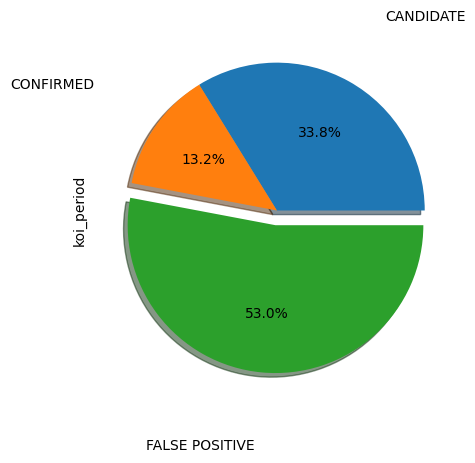

In [63]:
df1 = dataset.groupby(['koi_disposition']).sum().reset_index()
df1 = df1.set_index('koi_disposition')
plot = df1.plot.pie(y='koi_period', legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0, labeldistance=1.5, )